In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import tensorflow as tf

In [2]:
os.listdir('rna-seq-dataset')

['labels.csv',
 'data.csv',
 'Model_1',
 'Split2_60_40',
 '.ipynb_checkpoints',
 'Split1_60_40']

In [3]:
data = pd.read_csv("rna-seq-dataset/data.csv",delimiter = ',')

In [4]:
labels = pd.read_csv("rna-seq-dataset/labels.csv",delimiter = ',')

In [5]:
data.describe()

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
count,801.000000,801.000000,801.000000,801.000000,801.000000,801.0,801.000000,801.000000,801.000000,801.000000,...,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000
mean,0.026642,3.010909,3.095350,6.722305,9.813612,0.0,7.405509,0.499882,0.016744,0.013428,...,5.896573,8.765891,10.056252,4.847727,9.741987,11.742228,10.155271,9.590726,5.528177,0.095411
std,0.136850,1.200828,1.065601,0.638819,0.506537,0.0,1.108237,0.508799,0.133635,0.204722,...,0.746399,0.603176,0.379278,2.382728,0.533898,0.670371,0.580569,0.563849,2.073859,0.364529
min,0.000000,0.000000,0.000000,5.009284,8.435999,0.0,3.930747,0.000000,0.000000,0.000000,...,2.853517,6.678368,8.669456,0.000000,7.974942,9.045255,7.530141,7.864533,0.593975,0.000000
25%,0.000000,2.299039,2.390365,6.303346,9.464466,0.0,6.676042,0.000000,0.000000,0.000000,...,5.454926,8.383834,9.826027,3.130750,9.400747,11.315857,9.836525,9.244219,4.092385,0.000000
50%,0.000000,3.143687,3.127006,6.655893,9.791599,0.0,7.450114,0.443076,0.000000,0.000000,...,5.972582,8.784144,10.066385,5.444935,9.784524,11.749802,10.191207,9.566511,5.218618,0.000000
75%,0.000000,3.883484,3.802534,7.038447,10.142324,0.0,8.121984,0.789354,0.000000,0.000000,...,6.411292,9.147136,10.299025,6.637412,10.082269,12.177852,10.578561,9.917888,6.876382,0.000000
max,1.482332,6.237034,6.063484,10.129528,11.355621,0.0,10.718190,2.779008,1.785592,4.067604,...,7.771054,11.105431,11.318243,9.207495,11.811632,13.715361,11.675653,12.813320,11.205836,5.254133


In [6]:
data.head()

,Unnamed: 0,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,sample_0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0
1,sample_1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0
2,sample_2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0
3,sample_3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0
4,sample_4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0


In [7]:
labels.describe()

,Unnamed: 0,Class
count,801,801
unique,801,5
top,sample_0,BRCA
freq,1,300


In [8]:
labels.head()

,Unnamed: 0,Class
0,sample_0,PRAD
1,sample_1,LUAD
2,sample_2,PRAD
3,sample_3,PRAD
4,sample_4,BRCA


In [9]:
data.isnull()

,Unnamed: 0,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
797,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
798,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
799,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [10]:
data['Unnamed: 0']

0        sample_0
1        sample_1
2        sample_2
3        sample_3
4        sample_4
          ...    
796    sample_796
797    sample_797
798    sample_798
799    sample_799
800    sample_800
Name: Unnamed: 0, Length: 801, dtype: object

In [11]:
labels

,Unnamed: 0,Class
0,sample_0,PRAD
1,sample_1,LUAD
2,sample_2,PRAD
3,sample_3,PRAD
4,sample_4,BRCA
...,...,...
796,sample_796,BRCA
797,sample_797,LUAD
798,sample_798,COAD
799,sample_799,PRAD


In [12]:
labels['Class']

0      PRAD
1      LUAD
2      PRAD
3      PRAD
4      BRCA
       ... 
796    BRCA
797    LUAD
798    COAD
799    PRAD
800    PRAD
Name: Class, Length: 801, dtype: object

In [13]:
labels['Class'].unique()

array(['PRAD', 'LUAD', 'BRCA', 'KIRC', 'COAD'], dtype=object)

In [14]:
# data preprocessing
#changing the datatype of labels class to numeric 

In [15]:
labels = labels.replace({'PRAD':0})
labels = labels.replace({'LUAD':1})
labels = labels.replace({'BRCA':2})
labels = labels.replace({'KIRC':3})
labels = labels.replace({'COAD':4})

In [16]:
labels['Class'].unique()

array([0, 1, 2, 3, 4])

In [17]:
labels

,Unnamed: 0,Class
0,sample_0,0
1,sample_1,1
2,sample_2,0
3,sample_3,0
4,sample_4,2
...,...,...
796,sample_796,2
797,sample_797,1
798,sample_798,4
799,sample_799,0


In [18]:
#joining data and labels on samples
df1 = pd.DataFrame(data)
df1.head()

,Unnamed: 0,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,sample_0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0
1,sample_1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0
2,sample_2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0
3,sample_3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0
4,sample_4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0


In [19]:
df = df1.join(labels.set_index("Unnamed: 0"),on="Unnamed: 0").drop("Unnamed: 0",axis=1)

In [20]:
df

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530,Class
0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,0.0,...,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.000000,0
1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,0.0,...,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.000000,1
2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,0.0,...,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.000000,0
3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,0.0,...,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.000000,0
4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,0.0,...,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.000000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,0.0,1.865642,2.718197,7.350099,10.006003,0.0,6.764792,0.496922,0.0,0.0,...,9.118313,10.004852,4.484415,9.614701,12.031267,9.813063,10.092770,8.819269,0.000000,2
797,0.0,3.942955,4.453807,6.346597,10.056868,0.0,7.320331,0.000000,0.0,0.0,...,9.623335,9.823921,6.555327,9.064002,11.633422,10.317266,8.745983,9.659081,0.000000,1
798,0.0,3.249582,3.707492,8.185901,9.504082,0.0,7.536589,1.811101,0.0,0.0,...,8.610704,10.485517,3.589763,9.350636,12.180944,10.681194,9.466711,4.677458,0.586693,4
799,0.0,2.590339,2.787976,7.318624,9.987136,0.0,9.213464,0.000000,0.0,0.0,...,8.605387,11.004677,4.745888,9.626383,11.198279,10.335513,10.400581,5.718751,0.000000,0


In [21]:
#splitting data
train, test_val = train_test_split(df,test_size=0.4,random_state=42, shuffle = True)

In [22]:
#saving train and test files so project is recreatable the same way

In [23]:
#os.mkdir("rna-seq-dataset/Split1_60_40")
os.listdir('rna-seq-dataset')

['labels.csv',
 'data.csv',
 'Model_1',
 'Split2_60_40',
 '.ipynb_checkpoints',
 'Split1_60_40']

In [24]:
train_path = os.path.join("rna-seq-dataset/Split1_60_40","train.csv")
test_val_path = os.path.join("rna-seq-dataset/Split1_60_40","test.csv")

In [25]:
train.to_csv(train_path, sep = ',',index = False)
test_val.to_csv(test_val_path, sep = ',',index = False)

In [26]:
test, valid = train_test_split(test_val,test_size=0.5,random_state=42, shuffle = True)


In [27]:
test_path = os.path.join("rna-seq-dataset/Split1_60_40","test.csv")
valid_path = os.path.join("rna-seq-dataset/Split1_60_40","valid.csv")

In [28]:
test.to_csv(test_path, sep = ',',index = False)
valid.to_csv(valid_path, sep = ',',index = False)

In [29]:
print("No. of samples in training set "+ str(train['Class'].count()))
print("No. of samples in test set "+ str(test['Class'].count()))
print("No. of samples in validation set "+ str(valid['Class'].count()))

No. of samples in training set 480
No. of samples in test set 160
No. of samples in validation set 161


In [30]:
#Separating into labels and features
train_labels = train['Class']
del train['Class']
train_features = train

In [31]:

test_labels = test['Class']
del test['Class']
test_features = test

valid_labels = valid['Class']
del valid['Class']
valid_features = valid


In [32]:
#valid_labels;valid_features
train_features

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
257,0.0,4.396529,4.152792,6.804338,9.298195,0.0,7.724268,0.305912,0.0,0.0,...,6.636626,9.101309,10.377894,6.022661,10.223712,11.018687,10.793172,10.217715,4.348324,0.305912
766,0.0,3.351332,3.512277,7.927849,9.277999,0.0,7.540322,0.755571,0.0,0.0,...,5.869681,9.477833,10.417431,0.426640,9.376898,11.544056,10.783555,9.578671,4.951429,0.000000
544,0.0,2.651316,2.257946,6.289936,10.129605,0.0,7.981527,0.763327,0.0,0.0,...,6.403983,8.815198,10.209941,7.608898,10.002956,11.220971,9.834683,10.396904,5.962706,0.000000
15,0.0,2.901379,3.685368,6.669665,9.999098,0.0,6.948834,0.000000,0.0,0.0,...,6.348744,9.234868,9.983891,5.252472,9.687888,12.068835,9.973008,9.836426,9.052470,0.000000
3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,0.0,1.017138,2.526920,5.831520,9.959973,0.0,7.841583,0.000000,0.0,0.0,...,5.536317,8.512377,9.799868,6.120142,9.339512,12.115876,9.799868,9.364084,5.494188,0.000000
106,0.0,1.228542,1.880881,5.706903,10.026648,0.0,7.178426,0.449957,0.0,0.0,...,5.069397,8.502394,9.937915,2.923834,9.514911,12.364597,9.977738,9.537115,2.777472,0.000000
270,0.0,2.528396,2.620305,6.350181,9.007260,0.0,9.862189,1.446203,0.0,0.0,...,6.190097,8.205021,10.598397,5.077786,9.823576,11.732180,10.347455,9.279671,4.189730,0.000000
435,0.0,4.134196,3.722608,6.139899,9.642600,0.0,7.988401,1.683652,0.0,0.0,...,7.490530,9.152830,10.088960,0.797013,10.310397,12.173708,10.976041,10.023505,6.391709,0.000000


In [33]:
train_labels

257    0
766    4
544    2
15     2
3      0
      ..
71     2
106    1
270    3
435    3
102    2
Name: Class, Length: 480, dtype: int64

In [34]:
labels['Class'].unique()

array([0, 1, 2, 3, 4])

In [35]:
#checking how many classes are there 
train_labels.unique()# 5 classses in total 

array([0, 4, 2, 1, 3])

In [36]:
#but first we need to convert df into numpy array from pandas
train_labels = pd.DataFrame(train_labels).to_numpy()
train_labels.shape

(480, 1)

In [37]:
test_labels = pd.DataFrame(test_labels).to_numpy()
valid_labels = pd.DataFrame(valid_labels).to_numpy()
train_features = pd.DataFrame(train_features).to_numpy()
test_features = pd.DataFrame(test_features).to_numpy()
valid_features = pd.DataFrame(valid_features).to_numpy()
     

In [38]:
train_features

array([[ 0.        ,  4.39652943,  4.15279185, ..., 10.21771541,
         4.3483245 ,  0.30591217],
       [ 0.        ,  3.35133151,  3.51227746, ...,  9.57867082,
         4.95142927,  0.        ],
       [ 0.        ,  2.6513158 ,  2.25794595, ..., 10.39690442,
         5.96270633,  0.        ],
       ...,
       [ 0.        ,  2.52839628,  2.62030488, ...,  9.27967093,
         4.18972969,  0.        ],
       [ 0.        ,  4.13419629,  3.7226081 , ..., 10.02350487,
         6.3917093 ,  0.        ],
       [ 0.        ,  2.99048296,  2.48735772, ..., 10.17624796,
         6.94138806,  0.        ]])

In [39]:
#normalizing with tensorflow numpy array
#normalize along vertical axis i.e. for each gene
train_feature_norm = tf.keras.utils.normalize(train_features, axis=0, order=2)

In [40]:
train_feature_norm

array([[0.        , 0.06227793, 0.0586999 , ..., 0.04850483, 0.03358845,
        0.03382496],
       [0.        , 0.04747244, 0.0496462 , ..., 0.0454712 , 0.03824711,
        0.        ],
       [0.        , 0.03755654, 0.03191617, ..., 0.04935547, 0.04605868,
        0.        ],
       ...,
       [0.        , 0.03581536, 0.03703813, ..., 0.04405181, 0.03236339,
        0.        ],
       [0.        , 0.05856191, 0.05261923, ..., 0.04758289, 0.04937249,
        0.        ],
       [0.        , 0.04236093, 0.03515891, ..., 0.04830798, 0.05361846,
        0.        ]])

In [41]:
test_feature_norm = tf.keras.utils.normalize(test_features, axis=0, order=2)
valid_feature_norm = tf.keras.utils.normalize(valid_features, axis=0, order=2)

In [42]:
train_feature_norm.shape

(480, 20531)

### Logistic regression

In [43]:
model = LogisticRegression(multi_class = 'multinomial', solver='lbfgs', max_iter=1000)#Broyden–Fletcher–Goldfarb–Shanno Algorithm
#multi_class='ovr'

# Train the model on the training data
model.fit(train_feature_norm,train_labels.ravel())

# Make predictions on the validation data
valid_predictions = model.predict(valid_feature_norm)


Validation accuracy: 1.0
Test accuracy: 1.0


In [44]:
# Evaluate the model's accuracy on the validation data
accuracy = accuracy_score(valid_labels, valid_predictions)
print("Validation accuracy:", accuracy)

Validation accuracy: 1.0


In [45]:
# Make predictions on the test data
test_predictions = model.predict(test_feature_norm)

In [46]:
# Evaluate the model's accuracy on the test data
accuracy = accuracy_score(test_labels, test_predictions)
print("Test accuracy:", accuracy)

Test accuracy: 1.0


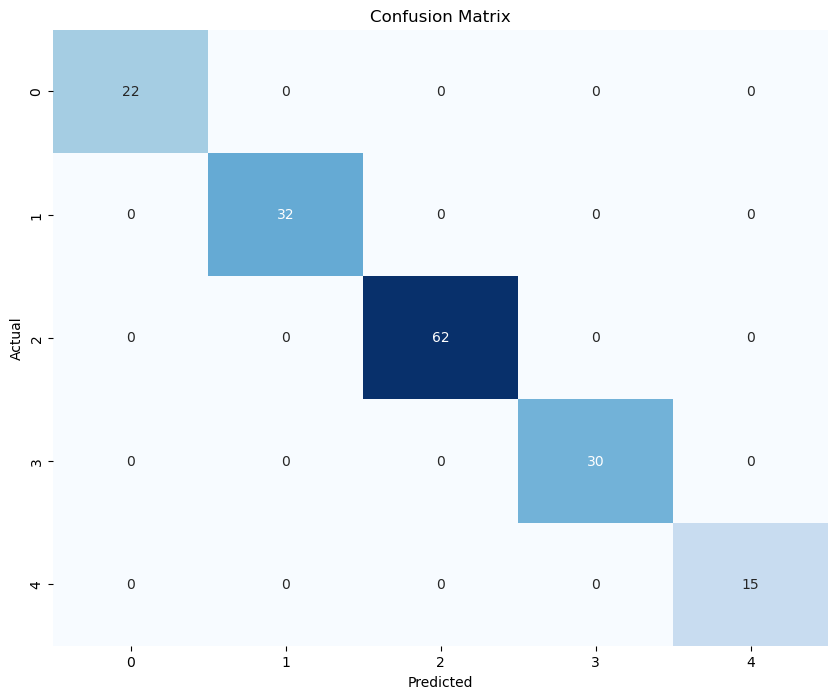

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split


# Create a confusion matrix
conf_matrix = confusion_matrix(valid_labels, valid_predictions)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [47]:
from sklearn.metrics import precision_score
precision = precision_score(test_labels, test_predictions, average='weighted')
precision

1.0

In [48]:
from sklearn.metrics import recall_score
recall = recall_score(test_labels, test_predictions, average='weighted')
recall

1.0

### Support vector machine

In [49]:
tfn = train_feature_norm[:100]

In [50]:
tl = train_labels[:100]

In [51]:
tfn, tl

(array([[0.        , 0.06227793, 0.0586999 , ..., 0.04850483, 0.03358845,
         0.03382496],
        [0.        , 0.04747244, 0.0496462 , ..., 0.0454712 , 0.03824711,
         0.        ],
        [0.        , 0.03755654, 0.03191617, ..., 0.04935547, 0.04605868,
         0.        ],
        ...,
        [0.27798929, 0.04692513, 0.07453542, ..., 0.04549457, 0.04096209,
         0.        ],
        [0.        , 0.03582421, 0.02180199, ..., 0.04155907, 0.0492803 ,
         0.        ],
        [0.        , 0.        , 0.0514623 , ..., 0.04396465, 0.0200566 ,
         0.        ]]),
 array([[0],
        [4],
        [2],
        [2],
        [0],
        [0],
        [0],
        [1],
        [2],
        [0],
        [0],
        [2],
        [0],
        [2],
        [2],
        [2],
        [0],
        [4],
        [1],
        [1],
        [0],
        [1],
        [2],
        [2],
        [2],
        [2],
        [3],
        [4],
        [2],
        [2],
        [1],
      

In [52]:
# Define parameter grid for hyperparameter tuning
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [0.1, 1, 10, 100], 'kernel': ['linear', 'rbf']}

# Perform grid search using validation set
best_score = 0
for C in param_grid['C']:
    for gamma in param_grid['gamma']:
        for kernel in param_grid['kernel']:
            svm = SVC(C=C, gamma=gamma, kernel=kernel)
            svm.fit(tfn, tl.ravel())
            score = svm.score(valid_feature_norm[:50], valid_labels[:50])
            if score > best_score:
                best_score = score
                best_parameters = {'C': C, 'gamma': gamma, 'kernel': kernel}

# Train final model on train sets and evaluate on test set
svm = SVC(**best_parameters)
svm.fit(tfn, tl.ravel())
y_pred = svm.predict(test_feature_norm[:50])
accuracy = accuracy_score(test_labels[:50], y_pred)
print("Accuracy on test set: {:.2f}".format(accuracy*100))

Accuracy on test set: 100.00


In [53]:
from sklearn.metrics import precision_score, recall_score
precision = precision_score(test_labels[:50], y_pred, average='weighted')
recall = recall_score(test_labels[:50], y_pred, average='weighted')

print("Precision on test set: {:.2f}".format(precision))
print("Recall on test set: {:.2f}".format(recall))

Precision on test set: 1.00
Recall on test set: 1.00


In [54]:
# Scale the features
from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()###
#X_train = scaler.fit_transform(train_feature_norm)
#X_test = scaler.transform(test_feature_norm)

# Train a SVM model
svm = SVC(**best_parameters)
svm.fit(train_feature_norm, train_labels.ravel())

# Make predictions on the test set
test_pred = svm.predict(test_feature_norm)

# Evaluate the model
accuracy = accuracy_score(test_labels, test_pred)
print("Accuracy:", accuracy*100)

Accuracy: 100.0


{'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}
[1.0, 0.38, 1.0, 0.38, 1.0, 0.38, 1.0, 0.38, 1.0, 0.42, 1.0, 0.38, 1.0, 0.38, 1.0, 0.38, 1.0, 0.42, 1.0, 0.38, 1.0, 0.38, 1.0, 0.38, 1.0, 0.42, 1.0, 0.38, 1.0, 0.38, 1.0, 0.38]


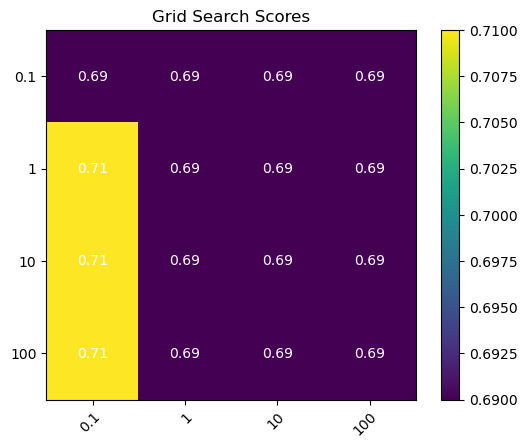

In [55]:
import matplotlib.pyplot as plt
import numpy as np

param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [0.1, 1, 10, 100], 'kernel': ['linear', 'rbf']}
scores = []
for C in param_grid['C']:
    for gamma in param_grid['gamma']:
        for kernel in param_grid['kernel']:
            svm = SVC(C=C, gamma=gamma, kernel=kernel)
            svm.fit(tfn, tl.ravel())
            score = svm.score(valid_feature_norm[:50], valid_labels[:50])
            scores.append(score)
            if score > best_score:
                best_score = score
                best_parameters = {'C': C, 'gamma': gamma, 'kernel': kernel}
print(best_parameters)
# Plot the scores as a heatmap
print(scores)
scores = np.array(scores).reshape(len(param_grid['C']), len(param_grid['gamma']), len(param_grid['kernel']))
fig, ax = plt.subplots()
im = ax.imshow(scores.mean(axis=2), cmap='viridis')
ax.set_xticks(np.arange(len(param_grid['gamma'])))
ax.set_yticks(np.arange(len(param_grid['C'])))
ax.set_xticklabels(param_grid['gamma'])
ax.set_yticklabels(param_grid['C'])
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
for i in range(len(param_grid['C'])):
    for j in range(len(param_grid['gamma'])):
        text = ax.text(j, i, "{:.2f}".format(scores.mean(axis=2)[i, j]),
                       ha="center", va="center", color="w")
ax.set_title("Grid Search Scores")
fig.colorbar(im)
plt.show()


### Random forest

In [56]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

Text(0, 0.5, 'Testing Accuracy')

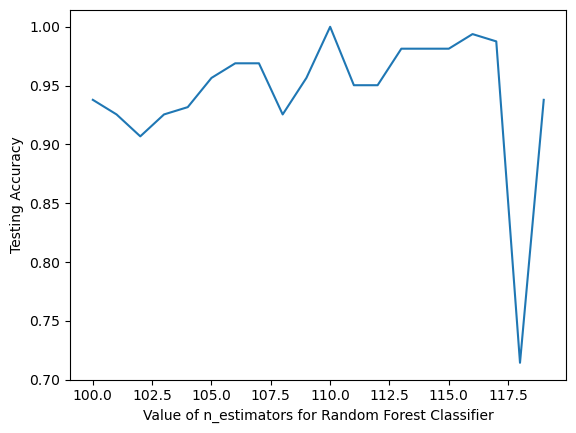

In [57]:
scores =[]
for k in range(100, 120):
    rfc = RandomForestClassifier(n_estimators=k)
    rfc.fit(train_feature_norm, train_labels.ravel())
    y_pred = rfc.predict(valid_feature_norm)
    scores.append(accuracy_score(valid_labels, y_pred))

import matplotlib.pyplot as plt
%matplotlib inline

# plot the relationship between K and testing accuracy
# plt.plot(x_axis, y_axis)
plt.plot(range(100, 120), scores)
plt.xlabel('Value of n_estimators for Random Forest Classifier')
plt.ylabel('Testing Accuracy')

In [58]:
# Create random forest model with 100 trees
rf_model = RandomForestClassifier(n_estimators=116)####

# Fit model to training data
rf_model.fit(train_feature_norm, train_labels.ravel())

# Make predictions on test data
test_pred = rf_model.predict(test_feature_norm)

# Evaluate model performance
accuracy = accuracy_score(test_labels, test_pred)
print('Accuracy: {:.2f}%'.format(accuracy*100))

Accuracy: 100.00%


In [59]:
rfc = RandomForestClassifier(n_estimators=116, random_state=42)

# Fit the model on the training set
rfc.fit(train_feature_norm, train_labels.ravel())

# Make predictions on the validation set
y_pred_val = rfc.predict(valid_feature_norm)

# Calculate the accuracy of the predictions on the validation set
acc_val = accuracy_score(valid_labels, y_pred_val)

# Make predictions on the test set
y_pred_test = rfc.predict(test_feature_norm)

# Calculate the accuracy of the predictions on the test set
acc_test = accuracy_score(test_labels, y_pred_test)

print(f"Validation set accuracy: {acc_val:.2f}")
print(f"Test set accuracy: {acc_test:.2f}")


Validation set accuracy: 0.99
Test set accuracy: 0.99


In [60]:
from sklearn.metrics import precision_score, recall_score
precision = precision_score(test_labels, y_pred_test, average='weighted')
recall = recall_score(test_labels, y_pred_test, average='weighted')

print("Precision on test set: {:.2f}".format(precision))
print("Recall on test set: {:.2f}".format(recall))

Precision on test set: 0.99
Recall on test set: 0.99


### K nearnest neighbours

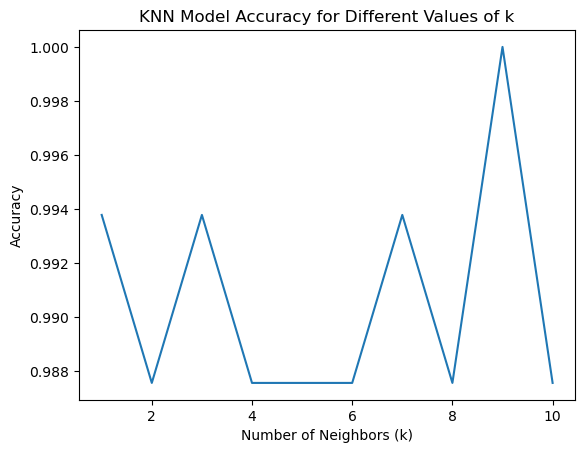

In [65]:
import matplotlib.pyplot as plt

k_values = []
accuracy_scores = []

for k in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(train_feature_norm, train_labels.ravel())
    y_pred = knn.predict(valid_feature_norm)
    score = accuracy_score(valid_labels, y_pred)
    k_values.append(k)
    accuracy_scores.append(score)

plt.plot(k_values, accuracy_scores)
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('KNN Model Accuracy for Different Values of k')
plt.show()


In [63]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Fit the KNN model to the training data
knn = KNeighborsClassifier(n_neighbors=9)###
knn.fit(train_feature_norm, train_labels.ravel())

# Predict the classes of the testing data
test_pred = knn.predict(test_feature_norm)

# Calculate the accuracy of the KNN model
accuracy = accuracy_score(test_labels, test_pred)
print("Accuracy: {:.2f}%".format(accuracy*100))


Accuracy: 100.00%


In [64]:
# Train KNN model with different hyperparameters and choose the best one using validation set
best_k = None
best_score = 0.0
for k in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(train_feature_norm, train_labels.ravel())
    y_pred = knn.predict(valid_feature_norm)
    score = accuracy_score(valid_labels, y_pred)
    if score > best_score:
        best_k = k
        best_score = score

# Test KNN model with best hyperparameters on test set
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(train_feature_norm, train_labels.ravel())
y_pred = knn.predict(test_feature_norm)
score = accuracy_score(test_labels, y_pred)
print("Test set accuracy: {:.4f}".format(score))


Test set accuracy: 1.0000


In [ ]:
from sklearn.metrics import precision_score, recall_score
precision = precision_score(test_labels, y_pred, average='weighted')
recall = recall_score(test_labels, y_pred, average='weighted')

print("Precision on test set: {:.2f}".format(precision))
print("Recall on test set: {:.2f}".format(recall))